# Let do some basic clustering

To enable interactive plot uncomment and urn the following code block.

In [1]:
# %matplotlib widget

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

First we import our data and remove outliers

In [3]:
df = pd.read_json('../data/21-2-12/output.json')
df = df[df['category'].str.contains("residential-sell")][['price','area','year','floor']].dropna()
df = df[(np.abs(zscore(df)) < 3).all(axis=1)]

Then we create some charts to gain some basic info about our data, 
(this may takes a few seconds because it calculates a linear regression as well)

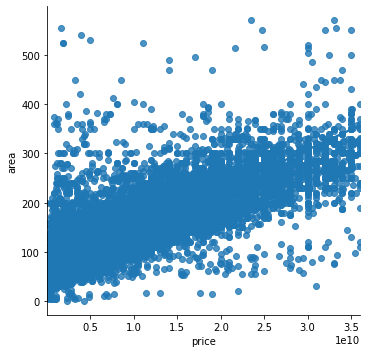

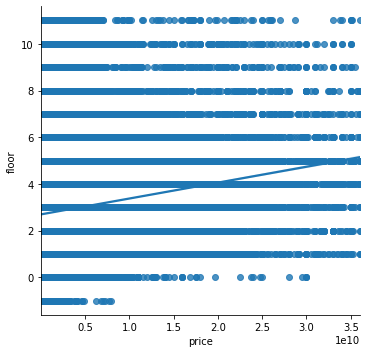

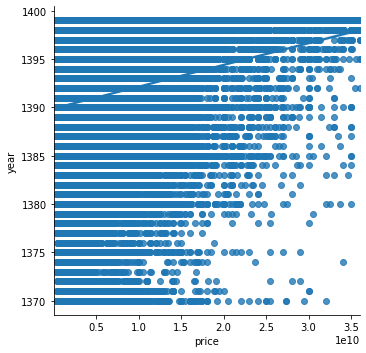

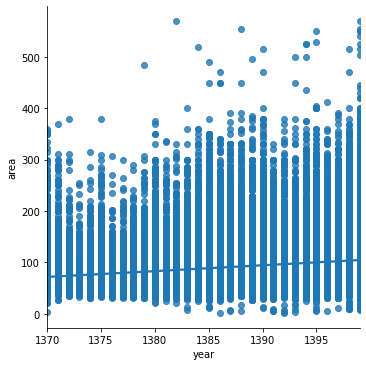

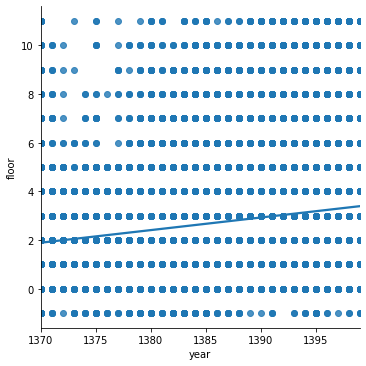

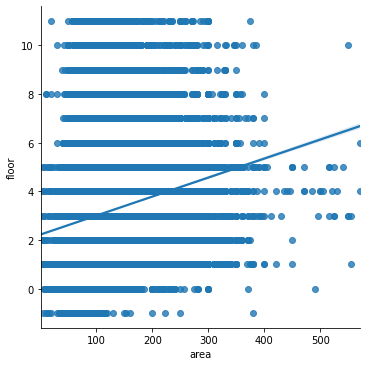

In [4]:
sns.lmplot(x='price',y='area',data=df)
sns.lmplot(x='price',y='floor',data=df)
sns.lmplot(x='price',y='year',data=df)
sns.lmplot(x='year',y='area',data=df)
sns.lmplot(x='year',y='floor',data=df)
sns.lmplot(x='area',y='floor',data=df)


We can see that there is relation between `price`, `year` and `area`;
So we try to create clusters based on these three attributes.
Of course we could use other attributes as well but this way it's easier
to visualize the result.

We use k-means clustering algorithm, and we use `StandardScaler` as preprocessor.

In [5]:
scaler = StandardScaler()
kmeans  = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(df)
result = df
result['label'] = pipeline.predict(df)

If you are on a browser and run the first code block as I mentioned, you can see an interactive plot, 
otherwise you see an image showing the result.

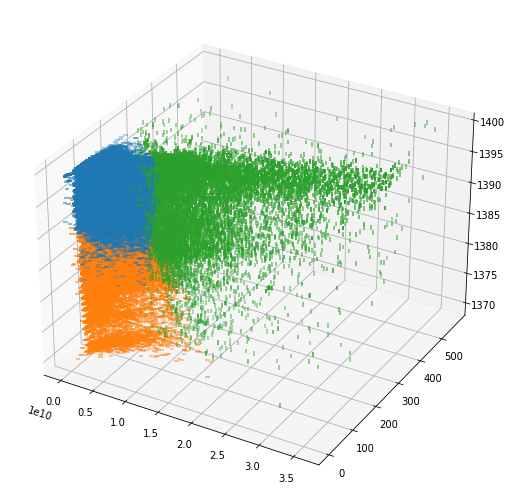

In [6]:
fig = plt.figure(figsize=(12, 9))
ax = plt.axes(projection='3d')
for grp_name, grp_idx in result.groupby('label').groups.items():
    items = result.loc[grp_idx]
    ax.scatter3D(items['price'], items['area'], items['year'], marker=grp_name)
plt.show()